In [1]:
import pandas as pd
import numpy as np
import mplleaflet 
import matplotlib.pyplot as plt
import networkx as nx 
import warnings
import math
import folium


# warnings.filterwarnings('ignore') 


In [2]:
df = pd.read_excel('plantilla_metro.xlsx')
df

,Estación Origen,Estación Destino,Color,linea,Logitud de Estación,Lat Origen,Long Origen,Lat Destino,Long Destino
0,San Pablo,Neptuno,Rojo,1,690,-33.445367,-70.723160,-33.451554,-70.722668
1,Neptuno,Pajaritos,Rojo,1,1030,-33.451554,-70.722668,-33.456570,-70.715493
2,Pajaritos,Las Rejas,Rojo,1,860,-33.456570,-70.715493,-33.457077,-70.707952
3,Las Rejas,Ecuador,Rojo,1,520,-33.457077,-70.707952,-33.455957,-70.703042
4,Ecuador,San Alberto Hurtado,Rojo,1,680,-33.455957,-70.703042,-33.453999,-70.692654
...,...,...,...,...,...,...,...,...,...
131,Biobío,Ñuble,Morado,6,2120,-33.476549,-70.642399,-33.466982,-70.625188
132,Ñuble,Estadio Nacional,Morado,6,1960,-33.466982,-70.625188,-33.462178,-70.606091
133,Estadio Nacional,Ñuñoa,Morado,6,930,-33.462178,-70.606091,-33.454355,-70.605443
134,Ñuñoa,Inés de Suárez,Morado,6,1820,-33.454355,-70.605443,-33.438830,-70.607217


In [3]:
# Convertir todos los valores de la columna 'linea' a cadenas de texto
df['linea'] = df['linea'].astype(str)

lineas = sorted(df['linea'].unique())

estaciones_linea = {}

for li in lineas:
    estaciones_linea['linea' + str(li)] = df['Estación Origen'].values[df['linea'] == li]

print(estaciones_linea)

# estaciones_linea['linea1']
# estaciones_linea['linea2']
# estaciones_linea['linea3']
# estaciones_linea['linea4']
# estaciones_linea['linea4A']
# estaciones_linea['linea5']
# estaciones_linea['linea6']


{'linea1': array(['San Pablo', 'Neptuno', 'Pajaritos', 'Las Rejas', 'Ecuador',
       'San Alberto Hurtado', 'Universidad de Santiago',
       'Estación Central', 'ULA', 'República', 'Los Héroes', 'La Moneda',
       'Universidad de Chile', 'Santa Lucía', 'Universidad Católica',
       'Baquedano', 'Salvador', 'Manuel Montt', 'Pedro de Valdivia',
       'Los Leones', 'Tobalaba', 'El Golf', 'Alcántara',
       'Escuela Militar', 'Manquehue', 'Hernando de Magallanes'],
      dtype=object), 'linea2': array(['Vespucio Norte', 'Zapadores', 'Dorsal', 'Einstein', 'Cementerios',
       'Cerro Blanco', 'Patronato', 'Puente Cal y Canto', 'Santa Ana',
       'Los Héroes', 'Toesca', "Parque O'Higgins", 'Rondizzoni',
       'Franklin', 'El Llano', 'San Miguel', 'Lo Vial', 'Departamental',
       'Ciudad del Niño', 'Lo Ovalle', 'El Parrón', 'La Cisterna',
       'Riquelme (El Bosque)', 'Observatorio', 'Lo Martínez'],
      dtype=object), 'linea3': array(['Plaza De Qulicura', 'Lo Cruzat', 'EFE Quilic

In [4]:
# colorear los nodos
# Diccionario para los colores de las líneas
colores_lineas = {
    'linea1': 'red',
    'linea2': 'yellow',
    'linea3': 'brown',
    'linea4': 'blue',
    'linea4A': 'grey',
    'linea5': 'green',
    'linea6': 'purple'
}

def colorear_nodos(G):
    color = []

    for node in G.nodes:
        asignado = False
        for linea, color_linea in colores_lineas.items():
            if node in estaciones_linea[linea]:
                color.append(color_linea)
                asignado = True
                break
        if not asignado:
            color.append('black')  # Color de respaldo si el nodo no pertenece a ninguna línea
    return color


In [5]:
def colorear_edges(G):
    color_edge = []

    for edge in G.edges:
        # Verificar si ambos nodos de la arista pertenecen a la misma línea
        if edge[0] in estaciones_linea['linea1'] and edge[1] in estaciones_linea['linea1']:
            color_edge.append('red')
        elif edge[0] in estaciones_linea['linea2'] and edge[1] in estaciones_linea['linea2']:
            color_edge.append('yellow')
        elif edge[0] in estaciones_linea['linea3'] and edge[1] in estaciones_linea['linea3']:
            color_edge.append('brown')
        elif edge[0] in estaciones_linea['linea4'] and edge[1] in estaciones_linea['linea4']:
            color_edge.append('blue')
        elif edge[0] in estaciones_linea['linea4A'] and edge[1] in estaciones_linea['linea4A']:
            color_edge.append('grey')
        elif edge[0] in estaciones_linea['linea5'] and edge[1] in estaciones_linea['linea5']:
            color_edge.append('green')
        elif edge[0] in estaciones_linea['linea6'] and edge[1] in estaciones_linea['linea6']:
            color_edge.append('purple')
        else:
            color_edge.append('black')  # Color para aristas que conectan diferentes líneas
    return color_edge

In [6]:
G = nx.Graph()

In [7]:
posiciones = {}
distancia_acumulada = {}

In [8]:
# Procesar las estaciones y agregar las aristas con el peso de la distancia
for i, row in df.iterrows():
    origen = row['Estación Origen'].strip()  # Eliminar espacios
    destino = row['Estación Destino'].strip()  # Eliminar espacios
    lat_origen = row['Lat Origen']
    long_origen = row['Long Origen']
    lat_destino = row['Lat Destino']
    long_destino = row['Long Destino']
    
    # Agregar nodos (estaciones) con sus coordenadas
    G.add_node(origen, pos=(long_origen, lat_origen))
    G.add_node(destino, pos=(long_destino, lat_destino))
    
    # Agregar arista (conexión) entre origen y destino
    G.add_edge(origen, destino)

# Obtener posiciones de los nodos
posiciones = nx.get_node_attributes(G, 'pos')


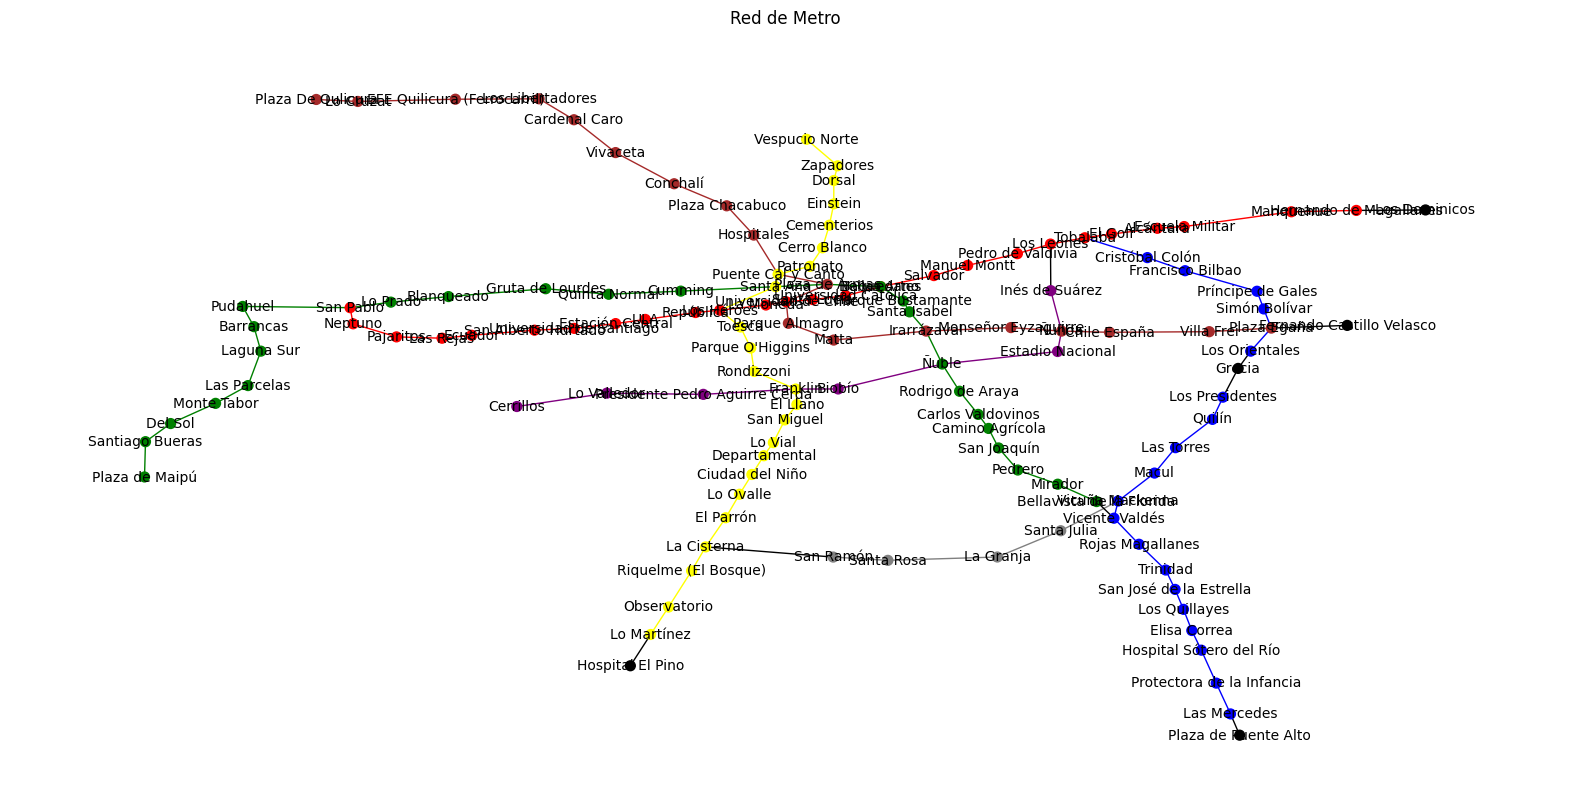

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

nx.draw(G, 
        pos=posiciones, 
        with_labels=True, 
        node_color=colorear_nodos(G), 
        edge_color=colorear_edges(G), 
        node_size=50, 
        font_size=10)

plt.title("Red de Metro")
plt.show()



In [12]:
# Crear y mostrar el mapa con Folium
centro_lat = df['Lat Origen'].mean()
centro_long = df['Long Origen'].mean()

mymap = folium.Map(location=[centro_lat, centro_long], zoom_start=12)

# Colorear los nodos y aristas
nodo_colores = colorear_nodos(G)
edge_colores = colorear_edges(G)

# Añadir nodos del grafo como marcadores
for i, node in enumerate(G.nodes):
    if node in df['Estación Origen'].values:
        lat = df.loc[df['Estación Origen'] == node, 'Lat Origen'].values[0]
        long = df.loc[df['Estación Origen'] == node, 'Long Origen'].values[0]
        folium.Marker(location=[lat, long], popup=node, icon=folium.Icon(color=nodo_colores[i])).add_to(mymap)
    else:
        print(f'El nodo {node} no se encontró en el DataFrame.')

# Añadir líneas entre estaciones con colores
for index, row in df.iterrows():
    origen = [row['Lat Origen'], row['Long Origen']]
    destino = [row['Lat Destino'], row['Long Destino']]
    
    # Determinar el color de la línea basado en el origen y destino
    edge_color = 'black'  # Color por defecto
    for edge_idx, edge in enumerate(G.edges):
        if (edge[0] == row['Estación Origen'] and edge[1] == row['Estación Destino']) or \
           (edge[0] == row['Estación Destino'] and edge[1] == row['Estación Origen']):
            edge_color = edge_colores[edge_idx]
            break

    folium.PolyLine(locations=[origen, destino], color=edge_color, weight=2.5, opacity=0.8).add_to(mymap)

# mymap.save("mapa.html")
mymap

El nodo Los Dominicos no se encontró en el DataFrame.
El nodo Hospital El Pino no se encontró en el DataFrame.
El nodo Fernando Castillo Velasco no se encontró en el DataFrame.
El nodo Grecia no se encontró en el DataFrame.
El nodo Plaza de Puente Alto no se encontró en el DataFrame.


C:\Users\nob96\AppData\Local\Temp\ipykernel_28808\273354722.py:16: UserWarning: color argument of Icon should be one of: {'white', 'orange', 'gray', 'pink', 'darkred', 'lightgreen', 'darkblue', 'red', 'purple', 'lightred', 'cadetblue', 'green', 'darkgreen', 'beige', 'lightgray', 'blue', 'black', 'lightblue', 'darkpurple'}.
  folium.Marker(location=[lat, long], popup=node, icon=folium.Icon(color=nodo_colores[i])).add_to(mymap)


In [13]:
METRO = nx.from_pandas_edgelist(df,source='Estación Origen',target='Estación Destino',edge_attr='Logitud de Estación')

In [14]:
METRO.nodes()

NodeView(('San Pablo', 'Neptuno', 'Pajaritos', 'Las Rejas', 'Ecuador', 'San Alberto Hurtado', 'Universidad de Santiago', 'Estación Central', 'ULA', 'República', 'Los Héroes', 'La Moneda', 'Universidad de Chile', 'Santa Lucía', 'Universidad Católica', 'Baquedano', 'Salvador', 'Manuel Montt', 'Pedro de Valdivia', 'Los Leones', 'Tobalaba', 'El Golf', 'Alcántara', 'Escuela Militar', 'Manquehue', 'Hernando de Magallanes', 'Los Dominicos', 'Vespucio Norte', 'Zapadores', 'Dorsal', 'Einstein', 'Cementerios', 'Cerro Blanco', 'Patronato', 'Puente Cal y Canto', 'Santa Ana', 'Toesca', "Parque O'Higgins", 'Rondizzoni', 'Franklin', 'El Llano', 'San Miguel', 'Lo Vial', 'Departamental', 'Ciudad del Niño', 'Lo Ovalle', 'El Parrón', 'La Cisterna', 'Riquelme (El Bosque)', 'Observatorio', 'Lo Martínez', 'Hospital El Pino', 'Plaza De Qulicura', 'Lo Cruzat', 'EFE Quilicura (Ferrocarril)', 'Los Libertadores', 'Cardenal Caro', 'Vivaceta', 'Conchalí', 'Plaza Chacabuco', 'Hospitales', 'Plaza de Armas', 'Parque 

In [15]:
METRO.edges()

EdgeView([('San Pablo', 'Neptuno'), ('San Pablo', 'Pudahuel'), ('San Pablo', 'Lo Prado'), ('Neptuno', 'Pajaritos'), ('Pajaritos', 'Las Rejas'), ('Las Rejas', 'Ecuador'), ('Ecuador', 'San Alberto Hurtado'), ('San Alberto Hurtado', 'Universidad de Santiago'), ('Universidad de Santiago', 'Estación Central'), ('Estación Central', 'ULA'), ('ULA', 'República'), ('República', 'Los Héroes'), ('Los Héroes', 'La Moneda'), ('Los Héroes', 'Santa Ana'), ('Los Héroes', 'Toesca'), ('La Moneda', 'Universidad de Chile'), ('Universidad de Chile', 'Santa Lucía'), ('Universidad de Chile', 'Plaza de Armas'), ('Universidad de Chile', 'Parque Almagro'), ('Santa Lucía', 'Universidad Católica'), ('Universidad Católica', 'Baquedano'), ('Baquedano', 'Salvador'), ('Baquedano', 'Bellas Artes'), ('Baquedano', 'Parque Bustamante'), ('Salvador', 'Manuel Montt'), ('Manuel Montt', 'Pedro de Valdivia'), ('Pedro de Valdivia', 'Los Leones'), ('Los Leones', 'Tobalaba'), ('Los Leones', 'Inés de Suárez'), ('Tobalaba', 'El Go

In [16]:
METRO.order()

127

In [17]:
for x in METRO.nodes():
    if METRO.degree(x) > 2:
        print(x)

San Pablo
Los Héroes
Universidad de Chile
Baquedano
Los Leones
Tobalaba
Puente Cal y Canto
Santa Ana
Franklin
La Cisterna
Plaza de Armas
Irarrázaval
Ñuñoa
Plaza Egaña
Vicuña Mackenna
Vicente Valdés
Ñuble


In [18]:
source = 'Santiago Bueras'
target = 'Plaza Egaña'

djk_path = nx.dijkstra_path(METRO, source=source, target=target, weight=True)
djk_path

['Santiago Bueras',
 'Del Sol',
 'Monte Tabor',
 'Las Parcelas',
 'Laguna Sur',
 'Barrancas',
 'Pudahuel',
 'San Pablo',
 'Lo Prado',
 'Blanqueado',
 'Gruta de Lourdes',
 'Quinta Normal',
 'Cumming',
 'Santa Ana',
 'Plaza de Armas',
 'Universidad de Chile',
 'Parque Almagro',
 'Matta',
 'Irarrázaval',
 'Monseñor Eyzaguirre',
 'Ñuñoa',
 'Chile España',
 'Villa Frei',
 'Plaza Egaña']

In [19]:
coords = []

for station in djk_path:
    lat_origen = df.loc[df['Estación Origen'] == station, 'Lat Origen'].values[0]
    long_origen = df.loc[df['Estación Origen'] == station, 'Long Origen'].values[0]
    lat_destino = df.loc[df['Estación Destino'] == station, 'Lat Destino'].values[0]
    long_destino = df.loc[df['Estación Destino'] == station, 'Long Destino'].values[0]
    
    coords.append({
        'Estación': station,
        'Lat Origen': lat_origen,
        'Long Origen': long_origen,
        'Lat Destino': lat_destino,
        'Long Destino': long_destino
    })

# Convertir la lista de coordenadas a un DataFrame para mejor visualización
coords_df = pd.DataFrame(coords)

# Mostrar el DataFrame
print(coords_df)




                Estación  Lat Origen  Long Origen  Lat Destino  Long Destino
0        Santiago Bueras  -33.496774   -70.757024   -33.496774    -70.757024
1                Del Sol  -33.489816   -70.752866   -33.489816    -70.752866
2            Monte Tabor  -33.482067   -70.745429   -33.482067    -70.745429
3           Las Parcelas  -33.475247   -70.740058   -33.475247    -70.740058
4             Laguna Sur  -33.462040   -70.737932   -33.462040    -70.737932
5              Barrancas  -33.452644   -70.739076   -33.452644    -70.739076
6               Pudahuel  -33.444883   -70.740935   -33.444883    -70.740935
7              San Pablo  -33.445367   -70.723160   -33.445367    -70.723160
8               Lo Prado  -33.443242   -70.716420   -33.443242    -70.716420
9             Blanqueado  -33.441106   -70.706877   -33.441106    -70.706877
10      Gruta de Lourdes  -33.438096   -70.690807   -33.438096    -70.690807
11         Quinta Normal  -33.440220   -70.680376   -33.440220    -70.680376

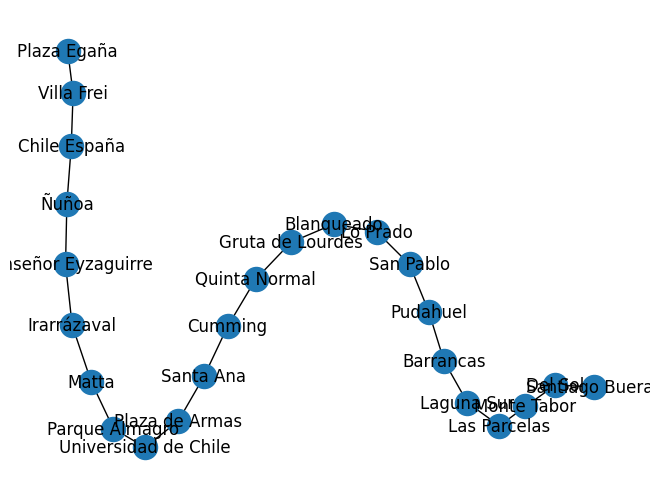

In [20]:
ruta1 = METRO.subgraph(djk_path)

nx.draw(ruta1, with_labels=True)

In [21]:
# Inicializar un mapa centrado en la primera estación de la ruta
map_center = [coords_df['Lat Origen'].mean(), coords_df['Long Origen'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Agregar cada estación al mapa
for index, row in coords_df.iterrows():
    folium.Marker(
        location=[row['Lat Origen'], row['Long Origen']],
        popup=f"{row['Estación']} (Origen)",
        icon=folium.Icon(color='blue')
    ).add_to(m)
    
    folium.Marker(
        location=[row['Lat Destino'], row['Long Destino']],
        popup=f"{row['Estación']} (Destino)",
        icon=folium.Icon(color='nodo_colores')
    ).add_to(m)

# Conectar las estaciones con líneas
for i in range(len(djk_path) - 1):
    start_station = djk_path[i]
    end_station = djk_path[i + 1]
    
    start_coords = coords_df.loc[coords_df['Estación'] == start_station, ['Lat Origen', 'Long Origen']].values[0]
    end_coords = coords_df.loc[coords_df['Estación'] == end_station, ['Lat Origen', 'Long Origen']].values[0]
    
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color=edge_color,
        weight=5,
        opacity=0.7
    ).add_to(m)

# Mostrar el mapa
m

C:\Users\nob96\AppData\Local\Temp\ipykernel_28808\590310367.py:16: UserWarning: color argument of Icon should be one of: {'white', 'orange', 'gray', 'pink', 'darkred', 'lightgreen', 'darkblue', 'red', 'purple', 'lightred', 'cadetblue', 'green', 'darkgreen', 'beige', 'lightgray', 'blue', 'black', 'lightblue', 'darkpurple'}.
  icon=folium.Icon(color='nodo_colores')
